In [1]:
import numpy as np
import cv2
import os
from numpy import linalg as LA # to compute eigen vectors
import matplotlib.pyplot as plt

In [2]:
imgData = []
testImgData = []

def load_images_from_folder(testFlag): # loading the images here
	if testFlag==0:
		images = []
		count=0
		
		for i in range(1,11):
			start = i*5 
			for j in range(0,4):
				img = cv2.imread("./temp/greyscale" + str(start) + ".png")
				start+=1
				if img is not None:
					img = np.array(img)
					img = img.astype('float64')
					newImg = img.reshape(-1)
					
					imgData.append(newImg)
				count+=1	
	else:
		images = []
		global testImgData
		count=0
		

		

		for i in range(1,11):
			img = cv2.imread("./tempTest/greyscale" + str(i) + ".png")
			if img is not None:
				img = np.array(img)
				img = img.astype('float64')
				newImg = img.reshape(-1)
				
				testImgData.append(newImg)
			count+=1

Below are some eigenfaces 


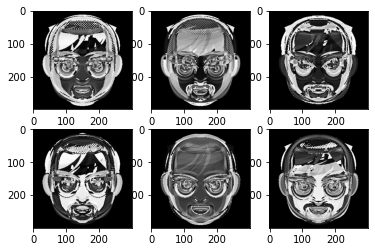

In [3]:
global imgData
load_images_from_folder(0)
imgData = np.array(imgData)
imgData = imgData.transpose()
maxIndTemp = np.argmax(imgData,axis=0)

A = [] # to hold the mean subtracted image vectors
meanVector = []
for i in range(0,np.shape(imgData)[1]):# finding the mean vector 
    if i==0:
        meanVector = imgData[:,i]
    else:
        meanVector = np.add(meanVector,imgData[:,i])
meanVector = meanVector/ ( np.shape(imgData)[1] )



for i in range(0,np.shape(imgData)[1]):# subtracting mean vector from each img
    temp = np.subtract(imgData[:,i] , meanVector)
    A.append(temp)
    
A = np.array(A)

A = A.transpose()
maxIndTemp = np.argmax(A,axis=0)



L = (A.transpose()).dot(A)


eigenVals,eigenVecs = LA.eig(L) # calculating the eigenvalues and eigen vectors here

temp = eigenVals
maxIndicesArr = [] # to store 10 highest valued eigenvals 

for i in range(10):
    index = np.argmax(temp)
    maxIndicesArr.append(index)
    temp[index] = -10000

vecs=[] 
for i in range(len(maxIndicesArr)):
    vecs.append(eigenVecs[maxIndicesArr[i]])
vecs = np.array(vecs)
vecs = vecs.transpose()
mu = [] # to hold the 10 highest eigen vectors

for i in range(np.shape(vecs)[1]):
    temp = []
    for j in range(len(vecs[:,i])):
        if j == 0:
            temp = vecs[j][i] * A[:,j]
        else:
            temp = np.add(temp,vecs[j][i]*A[:,j])
    mu.append(temp)

mu = np.array(mu)
mu=mu.transpose() #(270000,10) eigenfaces matrix
maxIndTemp = np.argmax(mu,axis=0)

fig,a =  plt.subplots(2,3)

print("Below are some eigenfaces ")
for i in range(6):
    eigenFaceImg = mu[:,i]
    eigenFaceImg = eigenFaceImg.reshape(300,300,3)
    eigenFaceImg = eigenFaceImg.astype(np.uint8)
    if (i<3):
        a[0][i].imshow(cv2.cvtColor(eigenFaceImg, cv2.COLOR_BGR2RGB))
    else:
        a[1][i-3].imshow(cv2.cvtColor(eigenFaceImg, cv2.COLOR_BGR2RGB))


Predicted   original 
1           1
Predicted   original 
2           2
Predicted   original 
3           3
Predicted   original 
4           4
Predicted   original 
5           5
Predicted   original 
6           6
Predicted   original 
7           7
Predicted   original 
6           8
Predicted   original 
6           9
Predicted   original 
10           10
Accuracy 80.0
Below are the test images


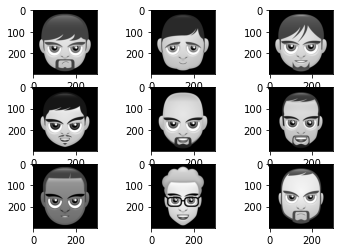

In [4]:
weightMatrix = []
for i in range(len(A[0,:])):
    temp = []
    for j in range(len(mu[0,:])):
        weight = mu[:,j].transpose().dot(A[:,i])
        temp.append(weight)
    weightMatrix.append(temp)
weightMatrix = np.array(weightMatrix)
count=0
tempSum = []
weightMod = [] # to hold the weight vector or eigenface representation of each class of images. I have 4 images of each subject 
for i in range(len(weightMatrix)+1):
    if i==0:
        tempSum = weightMatrix[i]	
        count+=1	
    else:
        if (count%4 == 0 and i != len(weightMatrix)):
            tempSum = tempSum/4
            weightMod.append(tempSum)
            tempSum = weightMatrix[i]
            count=1
        elif i == len(weightMatrix):
            tempSum = tempSum/4
            weightMod.append(tempSum)
        else:
            tempSum = np.add(tempSum,weightMatrix[i])
            count+=1
weightMod = np.array(weightMod)
weightMod = weightMod.transpose()
avgFaceWeight = []#weights for average face
for i in range(len(mu[0,:])):
    avgFaceWeight.append(meanVector.transpose().dot(mu[:,i]))
avgFaceVector = [] #phiF
temp=[]
for i in range(len(avgFaceWeight)):
    if i==0:
        avgFaceVector = avgFaceWeight[i]*mu[:,i]
    else:
        avgFaceVector = np.add(avgFaceVector,mu[:,i])

load_images_from_folder(1) # loading test dataset
global testImgData
testImgData = np.array(testImgData)
testImgData = testImgData.transpose()

fig,a =  plt.subplots(3,3)
prop = 0
for i in range(0,len(testImgData[0,:])):

    img = testImgData[:,i]
    incomingImg = img.reshape(300,300,3)
    incomingImg = incomingImg.astype(np.uint8)
    if(i<9):
        if i<3:
            a[0][i].imshow(cv2.cvtColor(incomingImg, cv2.COLOR_BGR2RGB))
        elif i>=3 and i<6:
            a[1][i-3].imshow(cv2.cvtColor(incomingImg, cv2.COLOR_BGR2RGB))
        else:
            a[2][i-6].imshow(cv2.cvtColor(incomingImg, cv2.COLOR_BGR2RGB))

    img = np.subtract(img,meanVector)
    weightTestImg = [] # to hold the weights or the eigenface representation of the new face image
    for j in range(len(mu[0,:])):
        weightTestImg.append(mu[:,j].transpose().dot(img))
    resultantVec = []

    weightTestImg = np.array(weightTestImg)
    weightTestImg = weightTestImg.transpose()

    for j in range(len(weightMod[0,:])):
        temp = np.subtract(weightTestImg,weightMod[:,j])
        resultantVec.append( round( np.linalg.norm(temp) ,3) ) # finding the norm of the subtracted vector -> OHM - OHMk
    
    
    resultantVec = np.array(resultantVec)
    print("Predicted "," original ")
    print(np.argmin(resultantVec)+1, "         ",i+1)
    if np.argmin(resultantVec)+1 == i+1:
        prop+=1
print("Accuracy",(prop/10.0)*100)
print("Below are the test images")